<a href="https://colab.research.google.com/github/rahul9903/Deepfake/blob/main/Deepfake_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connecting to Drive Storage **

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [ ]:
!pip install tensorflow==2.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 69.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Connecting the dataset from kaggle**

In [3]:
!pip install kaggle

In [8]:
!mkdir -p /root/.kaggle
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/


In [9]:
!kaggle competitions download -c deepfake-detection-challenge

100% 4.13G/4.13G [01:16<00:00, 68.7MB/s]
100% 4.13G/4.13G [01:16<00:00, 58.3MB/s]


In [10]:
!unzip /content/deepfake-detection-challenge.zip -d /content/deepfake_dataset


Archive:  /content/deepfake-detection-challenge.zip
  inflating: /content/deepfake_dataset/sample_submission.csv  
  inflating: /content/deepfake_dataset/test_videos/aassnaulhq.mp4  
  inflating: /content/deepfake_dataset/test_videos/aayfryxljh.mp4  
  inflating: /content/deepfake_dataset/test_videos/acazlolrpz.mp4  
  inflating: /content/deepfake_dataset/test_videos/adohdulfwb.mp4  
  inflating: /content/deepfake_dataset/test_videos/ahjnxtiamx.mp4  
  inflating: /content/deepfake_dataset/test_videos/ajiyrjfyzp.mp4  
  inflating: /content/deepfake_dataset/test_videos/aktnlyqpah.mp4  
  inflating: /content/deepfake_dataset/test_videos/alrtntfxtd.mp4  
  inflating: /content/deepfake_dataset/test_videos/aomqqjipcp.mp4  
  inflating: /content/deepfake_dataset/test_videos/apedduehoy.mp4  
  inflating: /content/deepfake_dataset/test_videos/apvzjkvnwn.mp4  
  inflating: /content/deepfake_dataset/test_videos/aqrsylrzgi.mp4  
  inflating: /content/deepfake_dataset/test_videos/axfhbpkdlc.mp4  
 

**Preprocessing**

In [11]:
def create_folder(path):
    """
    Creates folder

    Makes a new directory as path


    """
    if os.path.exists(path):
        print("{} already exists. Passing!".format(path))
        pass
    else:
        os.makedirs(path)
        print("{} created!".format(path))

In [12]:
import os
train_frame_folder = '/content/deepfake_dataset/train_sample_videos'
dataset = 'dataset'
real = 'dataset/real'
fake = 'dataset/fake'
create_folder(dataset)
create_folder(real)
create_folder(fake)


dataset created!
dataset/real created!
dataset/fake created!


In [13]:
import json
import dlib
import cv2

with open(os.path.join(train_frame_folder, 'metadata.json'), 'r') as file:
    data = json.load(file)
list_of_train_data = [f for f in os.listdir(train_frame_folder) if f.endswith('.mp4')]
detector = dlib.get_frontal_face_detector()
for vid in list_of_train_data:
    count = 0
    cap = cv2.VideoCapture(os.path.join(train_frame_folder, vid))
    frameRate = cap.get(5)
    while cap.isOpened():
        frameId = cap.get(1)
        ret, frame = cap.read()
        if ret != True:
            break
        if frameId % ((int(frameRate)+1)*1) == 0:
            face_rects, scores, idx = detector.run(frame, 0)
            for i, d in enumerate(face_rects):
                x1 = d.left()
                y1 = d.top()
                x2 = d.right()
                y2 = d.bottom()
                crop_img = frame[y1:y2, x1:x2]
                if data[vid]['label'] == 'REAL':
                    cv2.imwrite('dataset/real/'+vid.split('.')[0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                elif data[vid]['label'] == 'FAKE':
                    cv2.imwrite('dataset/fake/'+vid.split('.')[0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                count+=1

**Importing the libraries for model creation**

In [14]:
import dlib
import cv2
import os
import re
import json
from pylab import *
from PIL import Image, ImageChops, ImageEnhance
import os
import cv2
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [15]:
input_shape = (128, 128, 3)
data_dir = '/content/dataset'

real_data = [f for f in os.listdir(data_dir+'/real') if f.endswith('.png')]
fake_data = [f for f in os.listdir(data_dir+'/fake') if f.endswith('.png')]

X = []
Y = []

for img in real_data:
    X.append(img_to_array(load_img(data_dir+'/real/'+img)).flatten() / 255.0)
    Y.append(0)
for img in fake_data:
    X.append(img_to_array(load_img(data_dir+'/fake/'+img)).flatten() / 255.0)
    Y.append(1)

X_pkl = '/content/dataset/X_pkl.pkl'
Y_pkl = '/content/dataset/Y_pkl.pkl'
with open(X_pkl,'wb') as f:
  pickle.dump(X,f)

with open(Y_pkl,'wb') as f:
  pickle.dump(Y,f)

In [16]:
input_shape = (128, 128, 3)
X_pkl = '/content/dataset/X_pkl.pkl'
Y_pkl = '/content/dataset/Y_pkl.pkl'

X = pickle.load(open(X_pkl,'rb'))
Y = pickle.load(open(Y_pkl,'rb'))

Y_val_org = Y

#Normalization
X = np.array(X)
Y = to_categorical(Y, 2)

#Reshape
X = X.reshape(-1, 128, 128, 3)

#Train-Test split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)

**Creation of VGG19 Model**

In [17]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

# Define the input shape for the model
input_shape = (128, 128, 3)

# Load the VGG19 model without the top layer
vgg19_model = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)

# Set the VGG19 layers to be trainable
vgg19_model.trainable = True

# Build the sequential model
model = Sequential()

# Add the VGG19 base model
model.add(vgg19_model)

# Add a GlobalAveragePooling2D layer
model.add(GlobalAveragePooling2D())

# Add a Dense layer with softmax activation for classification
model.add(Dense(units=2, activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False),
              metrics=['accuracy'])

# Print the model summary
model.summary()


80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 20025410 (76.39 MB)
Trainable params: 20025410 (76.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
EPOCHS = 20
BATCH_SIZE = 100
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, Y_val), verbose=1)


Epoch 1/20
30/30 [==============================] - 82s 2s/step - loss: 0.5546 - accuracy: 0.7243 - val_loss: 0.4882 - val_accuracy: 0.7864
Epoch 2/20
30/30 [==============================] - 18s 599ms/step - loss: 0.4462 - accuracy: 0.8004 - val_loss: 0.4435 - val_accuracy: 0.7877
Epoch 3/20
30/30 [==============================] - 20s 666ms/step - loss: 0.3847 - accuracy: 0.8254 - val_loss: 0.3488 - val_accuracy: 0.8398
Epoch 4/20
30/30 [==============================] - 21s 688ms/step - loss: 0.2863 - accuracy: 0.8838 - val_loss: 0.2562 - val_accuracy: 0.8985
Epoch 5/20
30/30 [==============================] - 20s 668ms/step - loss: 0.2128 - accuracy: 0.9216 - val_loss: 0.2171 - val_accuracy: 0.9065
Epoch 6/20
30/30 [==============================] - 20s 658ms/step - loss: 0.1736 - accuracy: 0.9366 - val_loss: 0.2046 - val_accuracy: 0.9159
Epoch 7/20
30/30 [==============================] - 19s 625ms/step - loss: 0.1326 - accuracy: 0.9506 - val_loss: 0.2149 - val_accuracy: 0.9159
Ep

**Plotting of charts**

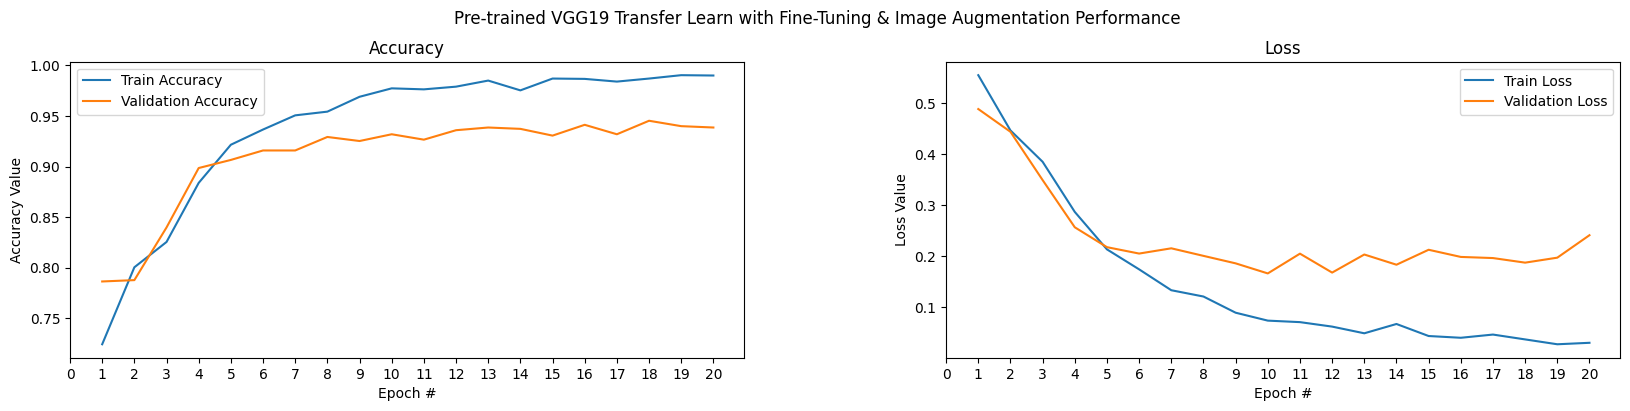

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Pre-trained VGG19 Transfer Learn with Fine-Tuning & Image Augmentation Performance ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,EPOCHS+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, EPOCHS+1, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, EPOCHS+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [20]:
model.save('/content/dataset/deepfake-detection-model-vgg.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Testing the model **

In [21]:
import tensorflow as tf
import dlib
import cv2
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops, ImageEnhance
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [22]:
test_videos = '/content/deepfake_dataset/test_videos'
os.listdir(test_videos)

['jytrvwlewz.mp4',
 'sngjsueuhs.mp4',
 'mkmgcxaztt.mp4',
 'cqhwesrciw.mp4',
 'ywxpquomgt.mp4',
 'mllzkpgatp.mp4',
 'ajiyrjfyzp.mp4',
 'ucthmsajay.mp4',
 'btdxnajogv.mp4',
 'ocgdbrgmtq.mp4',
 'pcoxcmtroa.mp4',
 'vwxednhlwz.mp4',
 'alrtntfxtd.mp4',
 'vbcgoyxsvn.mp4',
 'zyufpqvpyu.mp4',
 'fwykevubzy.mp4',
 'hnfwagcxdf.mp4',
 'xljemofssi.mp4',
 'fqgypsunzr.mp4',
 'dxfdovivlw.mp4',
 'tgawasvbbr.mp4',
 'sfsayjgzrh.mp4',
 'nswtvttxre.mp4',
 'ekboxwrwuv.mp4',
 'cnpanmywno.mp4',
 'iksxzpqxzi.mp4',
 'zgbhzkditd.mp4',
 'hitfycdavv.mp4',
 'bnuwxhfahw.mp4',
 'vvfszaosiv.mp4',
 'jzmzdispyo.mp4',
 'nxnmkytwze.mp4',
 'orekjthsef.mp4',
 'aqrsylrzgi.mp4',
 'phjvutxpoi.mp4',
 'udxqbhgvvx.mp4',
 'fpevfidstw.mp4',
 'shnsajrsow.mp4',
 'vajkicalux.mp4',
 'fmvvmcbdrw.mp4',
 'rfwxcinshk.mp4',
 'mxahsihabr.mp4',
 'kmqkiihrmj.mp4',
 'dxgnpnowgk.mp4',
 'doniqevxeg.mp4',
 'yiykshcbaz.mp4',
 'rnfcjxynfa.mp4',
 'bdshuoldwx.mp4',
 'ihglzxzroo.mp4',
 'axfhbpkdlc.mp4',
 'cekarydqba.mp4',
 'jyfvaequfg.mp4',
 'lnhkjhyhvw

In [23]:
video_name = input("Enter a video name: ")
video = video_name.split('.')[0]
extension = video_name.split('.')[1]
video_name = video + '.' + extension

Enter a video name: gfdjzwnpyp.mp4


In [24]:
from tensorflow.keras.models import load_model

def select_model(model_name):
    if model_name == 'VGG19':
        detection_model = load_model('/content/dataset/deepfake-detection-model-vgg.h5')
    else:
        return "An Error Occurred!!!"
    return detection_model

model = input("Select a model: \n\n1) VGG19 \n\n")
if model == '1':
    model = 'VGG19'
else:
    print("Enter correct option")

print("\n\nmodel: {} selected".format(model))


Select a model: 

1) VGG19 

1


model: VGG19 selected


1/1 [==============================] - 1s 1s/step
writing frame : 1
writing frame : 2
writing frame : 3
writing frame : 4
writing frame : 5
writing frame : 6
writing frame : 7
writing frame : 8
writing frame : 9
writing frame : 10
writing frame : 11
writing frame : 12
writing frame : 13
writing frame : 14
writing frame : 15
writing frame : 16
writing frame : 17
writing frame : 18
writing frame : 19
writing frame : 20
writing frame : 21
writing frame : 22
writing frame : 23
writing frame : 24
writing frame : 25
writing frame : 26
writing frame : 27
writing frame : 28
writing frame : 29
writing frame : 30
1/1 [==============================] - 0s 22ms/step
writing frame : 31
writing frame : 32
writing frame : 33
writing frame : 34
writing frame : 35
writing frame : 36
writing frame : 37
writing frame : 38
writing frame : 39
writing frame : 40
writing frame : 41
writing frame : 42
writing frame : 43
writing frame : 44
writing frame : 45
writing frame : 46
writing frame : 47
writing frame 

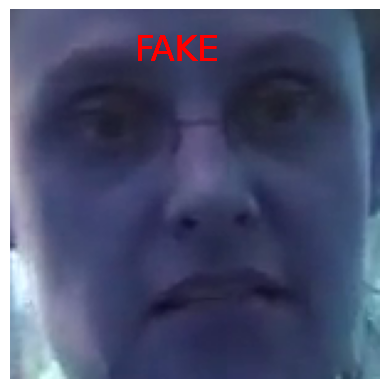

In [25]:
def prediction(model,video_path,folder_name):
    result_path = '/content/deepfake_dataset/result/' + folder_name
    if os.path.exists(result_path):
        shutil.rmtree(result_path)
        os.makedirs(result_path)
    else:
        os.makedirs(result_path)
    input_shape = (128, 128, 3)
    pr_data = []
    detector = dlib.get_frontal_face_detector()
    cap = cv2.VideoCapture(video_path)
    frameRate = cap.get(5)
    count = 0
    while cap.isOpened():

        frameId = cap.get(1)
        ret, frame = cap.read()
        if ret != True:
            break
        count += 1
        if frameId % ((int(frameRate)+1)*1) == 0:
            face_rects, scores, idx = detector.run(frame, 0)
            for i, d in enumerate(face_rects):
                x1 = d.left()
                y1 = d.top()
                x2 = d.right()
                y2 = d.bottom()
                crop_img = frame[y1:y2, x1:x2]
                data = img_to_array(cv2.resize(crop_img, (128, 128))).flatten() / 255.0
                data = data.reshape(-1, 128, 128, 3)
                if np.argmax(model.predict(data)) == 1:
                    plt.imshow(crop_img)
                    plt.axis('off')
                    plt.text(50,20,'FAKE',fontsize = 25,c = 'r')
                    plt.savefig(result_path + '/' + 'frame%d.jpg' % count)
                    print("writing frame : %d" % count)
                elif np.argmax(model.predict(data)) == 0:
                    plt.imshow(crop_img)
                    plt.axis('off')
                    plt.text(50,20,'REAL',fontsize = 25,c = 'r')
                    plt.savefig(result_path + '/' + 'frame%d.jpg' % count)
                    print("writing frame : %d" % count)
        else:
            face_rects, scores, idx = detector.run(frame, 0)
            for i, d in enumerate(face_rects):
                x1 = d.left()
                y1 = d.top()
                x2 = d.right()
                y2 = d.bottom()
                crop_img = frame[y1:y2, x1:x2]
                data = img_to_array(cv2.resize(crop_img, (128, 128))).flatten() / 255.0
                data = data.reshape(-1, 128, 128, 3)
                plt.imshow(crop_img)
                plt.axis('off')
                plt.savefig(result_path + '/' + 'frame%d.jpg' % count)
                print("writing frame : %d" % count)

mod = select_model(model)
prediction(mod,'/content/deepfake_dataset/test_videos/'+ video_name,video)

In [40]:
"""This code forms a video out of the collection of images"""

import os
import cv2

RESULT = '/content/deepfake_dataset/result'
CONTENT = os.listdir(RESULT)
print("Number of images loaded:", len(img))
for each in CONTENT:
    frames = os.listdir(RESULT + '/' + each)
    img=[]
    for frame in frames:
        img.append(cv2.imread(f'{RESULT}/{each}/{frame}'))

    height,width,layers=img[1].shape
    size = (width,height)
    video=cv2.VideoWriter(f'{RESULT}/{each}.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, size)

    for i in range(len(frames)):
        video.write(img[i])

cv2.destroyAllWindows()
video.release()

Number of images loaded: 0


IndexError: list index out of range